# Projeto de Aprendizagem de Máquina

## *Partitioning fuzzy K-medoids clustering algorithms with relevance weight for each dissimilarity matrix estimated locally*

In [5]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from scipy.spatial.distance import pdist, squareform

from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import matplotlib.pyplot as plt

### Leitura dos dados

In [6]:
PATH = '../data/'

In [7]:
view1 = pd.read_csv(os.path.join(PATH, 'mfeat-fac'), sep='\s+', header=None)
view2 = pd.read_csv(os.path.join(PATH, 'mfeat-fou'), sep='\s+',  header=None)
view3 = pd.read_csv(os.path.join(PATH, 'mfeat-kar'), sep='\s+',  header=None)

#### View 1

In [8]:
print(view1.shape)
view1.head()

(2000, 216)


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


In [9]:
view1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,272.0515,91.275454,67.0,208.00,274.5,338.0,515.0
1,2000.0,322.7255,109.426588,81.0,247.00,324.0,406.0,565.0
2,2000.0,774.8245,140.141570,500.0,656.75,766.0,879.0,1264.0
3,2000.0,754.3390,109.173768,543.0,667.00,736.0,830.0,1134.0
4,2000.0,640.4605,48.940117,437.0,607.00,636.5,667.0,823.0
...,...,...,...,...,...,...,...,...
211,2000.0,21.5840,7.982343,1.0,16.00,23.0,27.0,38.0
212,2000.0,17.6120,5.884451,1.0,13.00,18.0,21.0,36.0
213,2000.0,11.9680,2.579788,4.0,10.00,12.0,14.0,18.0
214,2000.0,13.7045,1.985485,5.0,12.00,14.0,15.0,19.0


#### View 2

In [10]:
print(view2.shape)
view2.head()

(2000, 76)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [11]:
view2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,0.185544,0.091898,0.004928,0.112066,0.176093,0.270290,0.395772
1,2000.0,0.377311,0.176231,0.009000,0.223410,0.401208,0.523692,0.771281
2,2000.0,0.269378,0.137980,0.005624,0.142086,0.288355,0.378611,0.665372
3,2000.0,0.265686,0.110694,0.010114,0.195214,0.255635,0.325003,0.748012
4,2000.0,0.300367,0.156256,0.002090,0.180421,0.282515,0.413297,0.796487
...,...,...,...,...,...,...,...,...
71,2000.0,0.166702,0.091240,0.007784,0.097974,0.149127,0.218640,0.457965
72,2000.0,0.230956,0.123441,0.003569,0.130623,0.232392,0.323222,0.601370
73,2000.0,0.267786,0.131009,0.011433,0.157886,0.251738,0.388339,0.620857
74,2000.0,0.143982,0.085663,0.001136,0.075864,0.130413,0.198687,0.510432


#### View 3

In [12]:
print(view3.shape)
view3.head()

(2000, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


In [13]:
view3.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,-1.119422,7.691305,-16.459305,-7.606095,-1.744261,4.806998,15.774811
1,2000.0,-0.684916,5.716466,-15.651466,-4.660418,-0.539887,3.409475,15.414573
2,2000.0,1.325787,5.574310,-14.333107,-2.704140,2.023201,5.354117,14.769929
3,2000.0,1.635315,5.507581,-14.303563,-2.186702,0.830831,5.360159,16.824829
4,2000.0,2.891171,3.994073,-8.213110,0.020924,2.693554,5.692744,14.992364
...,...,...,...,...,...,...,...,...
59,2000.0,-0.204876,1.050156,-3.624762,-0.940669,-0.204553,0.498455,3.351974
60,2000.0,-0.017153,0.907965,-3.056478,-0.647365,0.007285,0.585359,2.974369
61,2000.0,-0.049707,0.899926,-3.279887,-0.666966,-0.058137,0.521300,2.809290
62,2000.0,0.239816,0.892344,-2.617629,-0.393474,0.229076,0.849849,3.145101


### Obter target

In [14]:
y = pd.Series([int(i / 200) for i in range(2000)], index=view1.index)

### Pré-processamento

#### Normalização (reescala)

In [15]:
scaler = MinMaxScaler()
view1 = scaler.fit_transform(view1)

scaler = MinMaxScaler()
view2 = scaler.fit_transform(view2)

scaler = MinMaxScaler()
view3 = scaler.fit_transform(view3)

#### Dissimilaridade

In [16]:
view1 = squareform(pdist(view1))
view2 = squareform(pdist(view2))
view3 = squareform(pdist(view3))

In [17]:
pd.DataFrame(view1)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,1.725886,1.869928,1.759965,1.645997,3.301081,1.268244,1.252665,1.551345,1.625328,...,4.194407,4.087115,4.198332,3.317765,4.521834,4.160920,4.348320,4.040457,3.805022,4.600745
1,1.725886,0.000000,1.571679,1.553570,1.329155,2.576736,1.679099,1.690220,2.153856,1.446783,...,3.649613,4.005586,3.824178,2.858158,4.098826,3.738831,3.868827,3.680461,3.236586,4.153686
2,1.869928,1.571679,0.000000,1.616104,1.646691,2.997170,2.129503,1.786361,2.637528,1.718723,...,3.904762,4.261189,4.029427,3.178145,4.370217,3.881553,4.203490,3.969217,3.423565,4.545220
3,1.759965,1.553570,1.616104,0.000000,1.681033,2.566314,1.984997,1.875708,2.572424,1.562381,...,3.803966,3.697846,3.854261,3.028118,4.232098,3.829456,3.991010,3.741590,3.379092,4.255227
4,1.645997,1.329155,1.646691,1.681033,0.000000,2.575162,1.701834,1.178610,2.236434,1.753932,...,3.878807,3.960689,3.880548,3.077578,4.316539,3.782257,3.971378,3.692037,3.454330,4.287492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.160920,3.738831,3.881553,3.829456,3.782257,3.939873,4.068463,3.924021,4.365473,3.728196,...,1.847595,4.050167,1.923440,2.088153,2.312473,0.000000,2.483166,2.129954,1.753430,2.997773
1996,4.348320,3.868827,4.203490,3.991010,3.971378,3.896663,4.301339,3.989202,4.500203,4.133701,...,1.856652,3.985450,2.121931,3.049851,2.211533,2.483166,0.000000,2.970610,2.898650,2.449822
1997,4.040457,3.680461,3.969217,3.741590,3.692037,3.822823,3.928562,3.768974,4.235650,3.798585,...,2.293257,3.114244,2.025327,2.196002,3.061828,2.129954,2.970610,0.000000,1.899134,2.582854
1998,3.805022,3.236586,3.423565,3.379092,3.454330,3.690016,3.747376,3.657506,4.068222,3.488841,...,1.993954,3.864557,2.246586,1.766102,2.624392,1.753430,2.898650,1.899134,0.000000,3.206297


## Classificação

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.base import clone

### Separação dos dados

In [19]:
train, test = train_test_split(y.index, stratify=y)

In [20]:
y_train = y[train]
y_test = y[test]

In [21]:
y_train.value_counts().sort_index()

0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
8    150
9    150
dtype: int64

In [22]:
view1_train = view1[train]
view2_train = view2[train]
view3_train = view3[train]

view1_test = view1[test]
view2_test = view2[test]
view3_test = view3[test]

In [23]:
nb_1 = GaussianNB()
nb_2 = GaussianNB()
nb_3 = GaussianNB()

In [24]:
nb_1.fit(view1_train, y_train)
nb_2.fit(view2_train, y_train)
nb_3.fit(view3_train, y_train)

GaussianNB()

In [25]:
pred_1 = nb_1.predict_proba(view1_test)
pred_2 = nb_2.predict_proba(view2_test)
pred_3 = nb_3.predict_proba(view3_test)

In [26]:
pred_sum = (pred_1 + pred_2 + pred_3)
pred_classes = pred_sum.argmax(axis=1)

In [27]:
### Utilizando a soma de todas as views
print('Acurácia:', accuracy_score(y_test, pred_classes))

Acurácia: 0.906


In [28]:
### Utilizando classificadores e views individualmente
print('Acurácia por view:')
print('View 1:', accuracy_score(y_test, pred_1.argmax(axis=1)))
print('View 2:', accuracy_score(y_test, pred_2.argmax(axis=1)))
print('View 3:', accuracy_score(y_test, pred_3.argmax(axis=1)))

Acurácia por view:
View 1: 0.882
View 2: 0.648
View 3: 0.844


#### Valicação cruzada

In [29]:
def cross_val(model):
    results = []
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    for train, test in kfold.split(y.index, y):
        y_train = y[train]
        y_test = y[test]

        view1_train = view1[train]
        view2_train = view2[train]
        view3_train = view3[train]

        view1_test = view1[test]
        view2_test = view2[test]
        view3_test = view3[test]
        
        clf1 = clone(model)
        clf2 = clone(model)
        clf3 = clone(model)
        
        clf1.fit(view1_train, y_train)
        clf2.fit(view2_train, y_train)
        clf3.fit(view3_train, y_train)
        
        pred_1 = clf1.predict_proba(view1_test)
        pred_2 = clf2.predict_proba(view2_test)
        pred_3 = clf3.predict_proba(view3_test)
        
        pred_sum = (pred_1 + pred_2 + pred_3)
        pred_classes = pred_sum.argmax(axis=1)
        
        result = accuracy_score(y_test, pred_classes)
        results.append(result)
        
    return results

In [30]:
results_ = cross_val(GaussianNB())

In [31]:
results = []
for i in tqdm(range(30)):
    results_cross_val = cross_val(GaussianNB())
#     results_cross_val = results_
    results_cross_val_mean = np.mean(results_cross_val)
    results.append(results_cross_val_mean)

100%|██████████| 30/30 [00:49<00:00,  1.66s/it]


In [32]:
results

[0.8969999999999999,
 0.8939999999999999,
 0.8969999999999999,
 0.8960000000000001,
 0.8945000000000001,
 0.8939999999999999,
 0.8945000000000002,
 0.8950000000000001,
 0.8945000000000001,
 0.8934999999999998,
 0.8939999999999999,
 0.8960000000000001,
 0.893,
 0.8959999999999999,
 0.8945000000000001,
 0.8960000000000001,
 0.8954999999999999,
 0.897,
 0.8960000000000001,
 0.8954999999999999,
 0.8945000000000001,
 0.899,
 0.893,
 0.8955,
 0.8949999999999999,
 0.8960000000000001,
 0.897,
 0.8969999999999999,
 0.8935000000000001,
 0.8939999999999999]

### k-NN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(view1_train, y_train)
knn

KNeighborsClassifier()

In [51]:
pred = knn.predict_proba(view1_test)

In [66]:
neigh_dist, neigh_ind = knn.kneighbors(view1_test[:2], 5)

In [78]:
pred[0]

array([0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2])

In [77]:
y_train.iloc[neigh_ind[0]]

253     1
219     1
293     1
1915    9
327     1
dtype: int64

In [609]:
y_train.iloc[neigh_ind[0]].value_counts(normalize=True)

1    0.8
9    0.2
dtype: float64

### Parzen Window

In [97]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [622]:
kde = KernelDensity(kernel='gaussian', bandwidth=2)

In [536]:
values = view1_train[0].reshape(view1_train.shape[1], 1)

In [623]:
kde.fit(values, y_train)
scores = kde.score_samples(values)
scores = np.exp(scores)

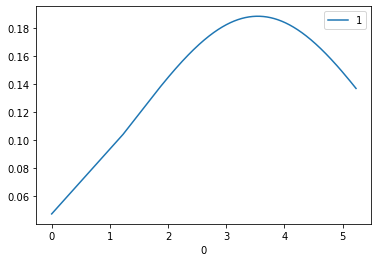

In [542]:
pd.DataFrame([values[:,0], scores]).T.plot(x=0, y=1)

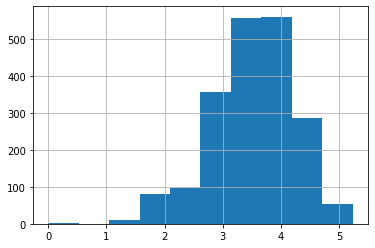

In [543]:
pd.Series(values[:, 0]).hist()

#### Implementação da predição com janela de parzen

In [544]:
classes = y.unique()
y_train_aux = y_train.reset_index(drop=True)
training_sets_classes = [view1_train[y_train_aux[y_train_aux == clasess[c]].index] for c in classes]

In [509]:
h = 1

In [511]:
log_prioris = np.log(y_train_aux.value_counts(normalize=True).sort_index()).to_list()

In [549]:
c = 0
rows, cols = training_sets_classes[c].shape
kernels = dict()

for c in classes:
    kernels['class_' + str(c)] = None
    kernels_class = []
    count = 0
    for col in range(cols):
        train_class_col = training_sets_classes[c][:, col]

        kde = KernelDensity(bandwidth=h, kernel='gaussian')
        kde.fit(train_class_col.reshape(len(train_class_col), 1))

        kernels_class.append(kde)
        count += 1
        kernels['class_' + str(c)] = kernels_class

In [620]:
kernels_class = kernels['class_3']


probs = []

for target in tqdm(clasess):
    kernels_class = kernels['class_' + str(target)]
    score_classes = []
    
    for col, kernel in enumerate(kernels_class):
        train_class_col = training_sets_classes[0][:, col]
        scores = kernel.score_samples(train_class_col.reshape(len(train_class_col), 1))
        scores = np.exp(scores)
        score_classes.append(scores)
        
    score_classes = np.array(score_classes)
    scores_prod = score_classes.prod(axis=0)
    scores_sum = scores_prod.sum()
    
#     (1/train_class_col.shape[0]) * (1/h**2000) * scores_sum
    
    probs.append(scores_sum)

100%|██████████| 10/10 [00:26<00:00,  2.69s/it]


In [621]:
probs

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [612]:
scores_prod = score_classes.prod(axis=0)
scores_sum = scores_prod.sum()

In [444]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [464]:
kde = KDEMultivariate(training_sets_classes[0], var_type='c'*2000, bw=2)

ValueError: The number of observations must be larger than the number of variables.

### Intervalo de confiança

In [33]:
def normality_test(sample, sample_name):
    stat, p = stats.shapiro(sample)
    alpha = 0.05
    if p > alpha:
        print(sample_name + ': segue a distribuição normal (falha em rejeitar H0)')
    else:
        print(sample_name + ' Não segue a distribuição normal (rejeita H0)')

In [34]:
normality_test(results, 'Resultado 1 (NB)')

Resultado 1 (NB): segue a distribuição normal (falha em rejeitar H0)


In [35]:
confidence_level = 0.95
degrees_freedom = len(results) - 1
sample_mean = np.mean(results)
sample_standard_error = stats.sem(results)

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print('Estimativa pontual:', sample_mean)
print('Intervalo de confiaça:', confidence_interval)
print('Confiança de {}%'.format(int(confidence_level*100)))

Estimativa pontual: 0.8952666666666665
Intervalo de confiaça: (0.894736924067777, 0.895796409265556)
Confiança de 95%


### Friedman test

In [36]:
results_1 = np.array(results)

In [37]:
### Simulação de resultados diferentes. Será substituído pelos resultados obtidos com os modelos II e III
results_2 = np.array(results_1)
results_3 = np.array(results_1)

In [38]:
results_2[-1] = results_2[-1] + 0.0012
results_2[0] = results_2[0] - 0.0014

results_3[-2] = results_3[-2] + 0.0021
results_3[-2] = results_3[2] - 0.0012

In [39]:
stat, p = stats.friedmanchisquare(results_1, results_2, results_3)

In [40]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Distribuições iguais (falha em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeita H0)')

Statistics=0.667, p=0.717
Distribuições iguais (falha em rejeitar H0)


### Regra da soma

In [41]:
def fit(estimators, X, y):
    for estimator in estimators:
        estimator.fit(X, y)

In [42]:
def predict(estimators, X):
    predictions = []
    for estimator in estimators:
        pred = estimator.predict_proba(X)
        predictions.append(pred)
        
    predictions = np.array(predictions)
    
    predictions = np.sum(predictions, axis=0)
    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

In [43]:
nb_1 = GaussianNB()
nb_2 = GaussianNB()
nb_3 = GaussianNB()

In [44]:
estimators = [nb_1, nb_2, nb_3]
fit(estimators, view1_train, y_train)

In [45]:
pred = predict(estimators, view1_test)